# DS Data Exercise 

This data exercise is composed of a small sample of our data and a machine learning pipeline that generates a model. The goal of the exercise is to give you a small taste of what it's like to work with our data as well as an opportunity for us to understand your process! **Understanding your process is just as important to us as your answers.**


### Real Time Bidding Auctions 

One of the most common ways websites make money is through ads. Websites that run ads, like NYTimes.com, sell their adspace at auction in **Real Time Bidding (RTB)** markets. RTB auctions are lightning fast (100 milliseconds), and there are millions of auctions per second. If you want to buy ad space, you’re going need some seriously fast technology to help you participate in these auctions! Cue The Trade Desk. We use a variety of data to automatically determine whether we bid and how much to bid on your behalf. If our bid is the highest in the auction, we get to show people your ad.

### About the Data Set

The data set used in this exercise contains information from thousands of auctions that we won during one week. Each row has a unique `BidFeedbackId` and represents an instance of an ad being shown to a user. We call each row an impression. The `CreativeId` column identifies which ad we showed. The `TDID` column represents which user device we showed the ad to. We've filtered the data such that all the `TDID`s are from the devices of people that work or study at one of three locations. **Two of the locations are well known tech companies. One location is a university**.

### About the Model Pipeline

The goal of the pipeline is to generate a model that predicts the Location column for an impression. It extracts various features from the dataset, splits into a train and test set, trains a model, and measures performance on the task. The model generated by this pipeline will be used to drive a product that helps the tech organizations recruit likely candidates from the university.

### Content of Table

* **Part 1 - Analyze**
Can you use data analysis to make an educated guess about the names of the locations represented by each of the three Location column ids?

* **Part 2 - Model**
We would like you to make one or two improvements to the location prediction model provided.

* **Part 3 - Brainstorm**
Briefly describe (in words, not code) how you would approach the task of identifying similar users based on the provided dataset.



In [2]:
import pandas as pd
df_imps = pd.read_csv("data.csv")

In [2]:
df_imps.head()

,LogEntryTime,CreativeId,AdFormat,WinningPriceCPMInBucks,Site,DeviceType,OSFamily,OS,Browser,RenderingContext,TemperatureInCelsius,Location,TDID
BidFeedbackId,,,,,,,,,,,,,
2efcd9d6-aa7e-4d28-8c40-046b1f5c3380,2019-02-05 19:55:35.665500,yz3dcmu5,640x360,9.822400,bgr.com,PC,Windows,Windows10,Chrome,Other,NaN,2,140823.0
4bee1dbc-4c22-48df-b871-4c8f5d622b75,2019-02-06 20:41:06.098200,w5nfniw0,640x360,5.700000,www.yahoo.com,PC,Windows,Windows10,Chrome,Other,-0.21,2,96342.0
5f5fa723-7687-49d5-a426-9816440c661d,2019-02-07 05:43:24.024600,e36upnpp,300x50,0.150800,393630966,Mobile,iOS,iOS121,WebView,InApp,8.35,1,369932.0
5a12c165-cb87-492c-9994-e17e51ca883d,2019-02-05 18:47:13.092000,bl4j44t0,320x50,3.580941,wis.pr,Mobile,Android,Android50,Chrome,Other,-3.51,2,586682.0
006dfed2-048a-4dee-8a92-74c0c95b7561,2019-02-07 22:10:26.780800,wipt600h,160x600,0.269040,www.wenxuecity.com,PC,Windows,Windows10,Chrome,Other,NaN,2,115644.0


In [4]:
df_imps.shape

(115016, 13)

In [17]:
import matplotlib.pyplot as plt

def plot_pieChart(data, attribute="Browser"):
    
    df1 = data.query("Location=='1'")[attribute].value_counts()/len(data.query("Location=='1'"))
    df2 = data.query("Location=='2'")[attribute].value_counts()/len(data.query("Location=='2'"))
    df3 = data.query("Location=='3'")[attribute].value_counts()/len(data.query("Location=='3'"))

    fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
    ax1.pie(df1.values, labels=[x for x in list(df1.index)], autopct='%1.1f%%', shadow=True, startangle=90, normalize=False )
    ax1.set_title("location = '1', "+attribute)
    ax2.pie(df2.values, labels=[x for x in list(df2.index)], autopct='%1.1f%%', shadow=True, startangle=90, normalize=False )
    ax2.set_title("location = '2', "+attribute)
    ax3.pie(df3.values, labels=[x for x in list(df3.index)], autopct='%1.1f%%', shadow=True, startangle=90, normalize=False )
    ax3.set_title("location = '3', "+attribute)

    plt.show()

## Part 1 - Analyze

For each of the three ids in the `Location` column, can you guess the name of the institution? HINT: Two of the locations are well known tech companies. One location is a university.

In [5]:
df_imps['Location'].value_counts()

2    70467
3    31426
1    13123
Name: Location, dtype: int64

In [6]:
df_imps['LogEntryTime'].max(), df_imps['LogEntryTime'].min()

(Timestamp('2019-02-07 23:59:58.136200'),
 Timestamp('2019-02-01 00:00:16.205500'))

### Mean temperature

The mean temperatures give us hint the location. **Location 2** is colder, whereas **Location 3** is warmer.

In [8]:
round(df_imps.query("Location=='1'")['TemperatureInCelsius'].mean(), 3), round(df_imps.query("Location=='2'")['TemperatureInCelsius'].mean(), 3), round(df_imps.query("Location=='3'")['TemperatureInCelsius'].mean(), 3)

(9.745, 1.943, 12.014)

### Browsing site

In [9]:
 df_imps.query("Location=='1'")['Site'].value_counts().head(10)

mail.yahoo.com        607
www.wenxuecity.com    485
www.yahoo.com         426
295646461             370
www.cnn.com           241
www.sfgate.com        208
finance.yahoo.com     192
341232718             191
584632814             185
www.spotify.com       180
Name: Site, dtype: int64

In [10]:
df_imps.query("Location=='2'")['Site'].value_counts().head(10)

mail.yahoo.com           1603
www.cnn.com              1184
www.msn.com              1029
www.wenxuecity.com        940
www.accuweather.com       856
www.instructables.com     805
weather.com               792
www.c-sharpcorner.com     751
295646461                 725
www.yahoo.com             705
Name: Site, dtype: int64

In [11]:
df_imps.query("Location=='3'")['Site'].value_counts().head(10)

www.spanishdict.com         1045
www.sparknotes.com           792
www.slader.com               744
www.spotify.com              742
mail.yahoo.com               733
www.yahoo.com                690
www.ratemyprofessors.com     657
429610587                    627
www.thesaurus.com            570
quizlet.com                  534
Name: Site, dtype: int64

### `Browser`

From the above pie charts, large portion users at location 2 used **Edge**, which is different from location 1 or 3.

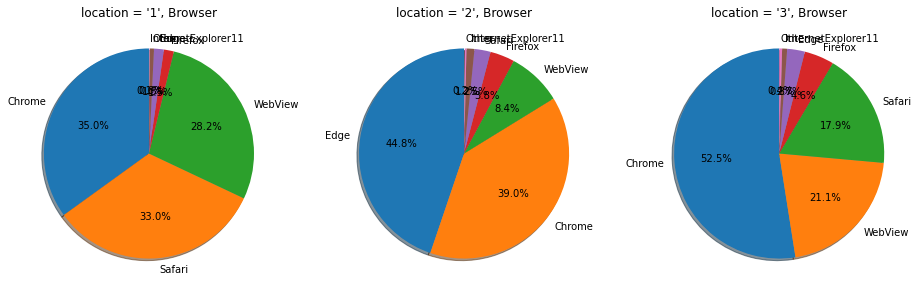

In [18]:
plot_pieChart(df_imps, attribute="Browser")

### `OSFamily`

From the above pie chart, more than 80% users at location 2 use **Windows** as OS. This supports location 2 could be **Microsoft**.

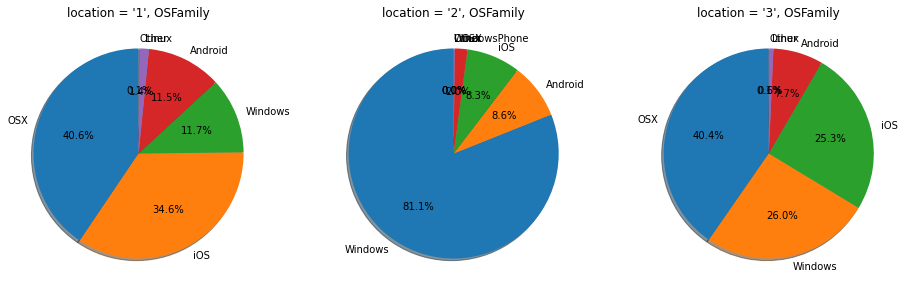

In [19]:
plot_pieChart(df_imps, attribute="OSFamily")

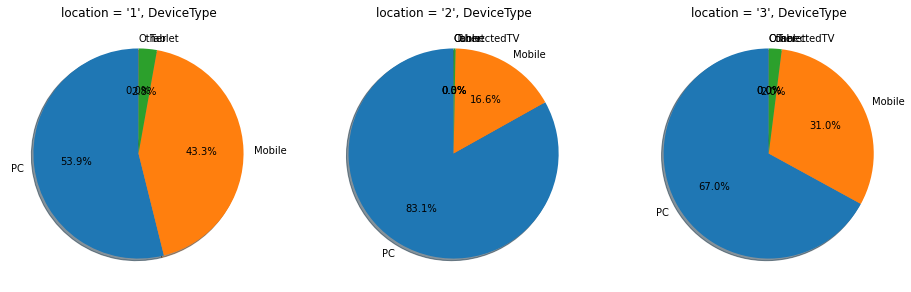

In [20]:
plot_pieChart(df_imps, attribute="DeviceType")

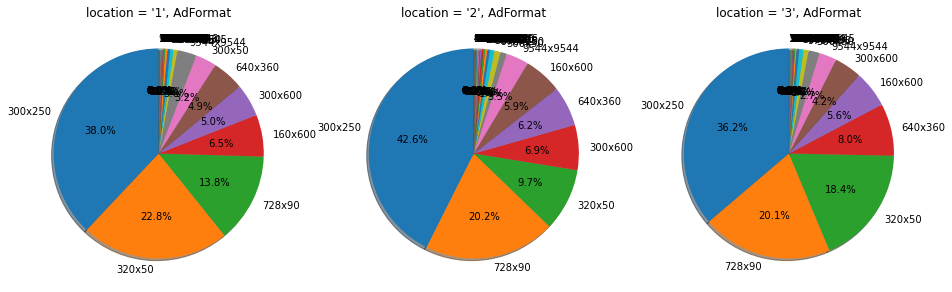

In [21]:
plot_pieChart(df_imps, attribute="AdFormat")

## Part 1 Reflection

### What do you think Location 1 is and why?

I guess Location 1 is located Northern California since the mean temperature is 9C, warmer than location 2 but colder than location 3. It could be Apple or Google etc. However, large portion OSX and iOS in the `OSFamily` pie chart and Safari in `Browser` show the users use Apple products. Therefore I guess it is Apple. (I feel if location 1 is Google, there should be more users using Android.)

### What do you think Location 2 is and why?

I think Location 2 is Microsoft (MS). The first evidence based on the majority of OS is Windows; I know most employees at MS used Windows in PC. Also, the major broswer from location 2 is Edge, which is developed by Microsoft. The users at location 2 also have higher frequency to visited www.msn.com than other locations. Finally, since the data was collected on Feb and the mean temperature is about 1.9C, I believe it is located north. Combined with the observations, I conclude location 2 is MS.

### What do you think Location 3 is and why?

Obviously location 3 is a university. The reaosn is the Top 10 sites like www.spanishdict.com, www.sparknotes.com, and even www.ratemyprofessors.com are all about school learning websites. Most likely are students to browse them.

Since the mean temperature is 12C, I think it is in south compared to location 1 and 2. Furthermore I noticed the browsing links include www.nbcsandiego.com and fox5sandiego.com (between top 100-150), I will infer the university is in San Diego. So I will guess location 3 is UC San Diego or California State SD, etc.


## Part 2 - Model
We would like you to make one or two improvements to the following model. We'd like to emphasize that we are interested in your thought process and how you prioritize improvements given time constraints, not absolute model performance.

### Prepare labels and features

This section contains code that creates two new dataframes: 
1. `df_labels`, which contains only the target variable, `Location`.
2. `df_feats`, which contains features derived from some (but not all) columns in `df_imps`. You may wish to add or subtract features.

In [8]:
df_labels = df_imps[['Location']]
df_labels.head()

,Location
0,2
1,2
2,1
3,2
4,2


In [6]:
def extract_categorical_features(df, onehot_cols, minimum_count=1000):
    """
      This function creates a one-hot encoding of a set of columns.
  
      Args:
        df: A dataframe with categorical columns.
        onehot_cols: A list of columns in the dataframe to one-hot encode.
        minimum_count: The minimum number of instances of a category to be included in the encoding.
  
      Returns:
        A new dataframe, with the same index as df, with one column per ColName_Value. ColName_Value 
        will be set to 1 if that row has ColName==Value and 0 otherwise. A ColName_Value column will only 
        be created if there are at least minimum_count instances of Value in ColName.
    """
    df_feats = df[[]].copy()
    for col in onehot_cols:
        value_counts = df[col].value_counts()
        for value in value_counts[value_counts >= minimum_count].index:
            df_feats['%s_%s' % (col, value)] = (df[col] == value).astype(int)
    return df_feats


# Extract features from categorical columns
df_feats = extract_categorical_features(
    df_imps, 
    onehot_cols=['DeviceType', 'AdFormat'] # Edit list to add/subtract columns
    )
# Extract features from other columns (i.e., all features that aren't one-hots)
df_feats['WinningPriceCPMInCents'] = df_imps['WinningPriceCPMInBucks']*100

df_feats.head()

,DeviceType_PC,DeviceType_Mobile,DeviceType_Tablet,AdFormat_300x250,AdFormat_728x90,AdFormat_320x50,AdFormat_640x360,AdFormat_300x600,AdFormat_160x600,AdFormat_9544x9544,AdFormat_300x50,WinningPriceCPMInCents
0,1,0,0,0,0,0,1,0,0,0,0,982.240000
1,1,0,0,0,0,0,1,0,0,0,0,570.000000
2,0,1,0,0,0,0,0,0,0,0,1,15.080000
3,0,1,0,0,0,1,0,0,0,0,0,358.094064
4,1,0,0,0,0,0,0,0,1,0,0,26.904000


In [24]:
df_feats.describe().T

,count,mean,std,min,25%,50%,75%,max
DeviceType_PC,115016.0,0.753869,0.430758,0.0,1.0,1.00,1.0,1.0
DeviceType_Mobile,115016.0,0.235680,0.424425,0.0,0.0,0.00,0.0,1.0
DeviceType_Tablet,115016.0,0.010346,0.101190,0.0,0.0,0.00,0.0,1.0
AdFormat_300x250,115016.0,0.403248,0.490552,0.0,0.0,0.00,1.0,1.0
AdFormat_728x90,115016.0,0.194286,0.395652,0.0,0.0,0.00,0.0,1.0
AdFormat_320x50,115016.0,0.135364,0.342113,0.0,0.0,0.00,0.0,1.0
AdFormat_640x360,115016.0,0.065382,0.247200,0.0,0.0,0.00,0.0,1.0
AdFormat_300x600,115016.0,0.059879,0.237263,0.0,0.0,0.00,0.0,1.0
AdFormat_160x600,115016.0,0.058731,0.235121,0.0,0.0,0.00,0.0,1.0
AdFormat_9544x9544,115016.0,0.032196,0.176520,0.0,0.0,0.00,0.0,1.0


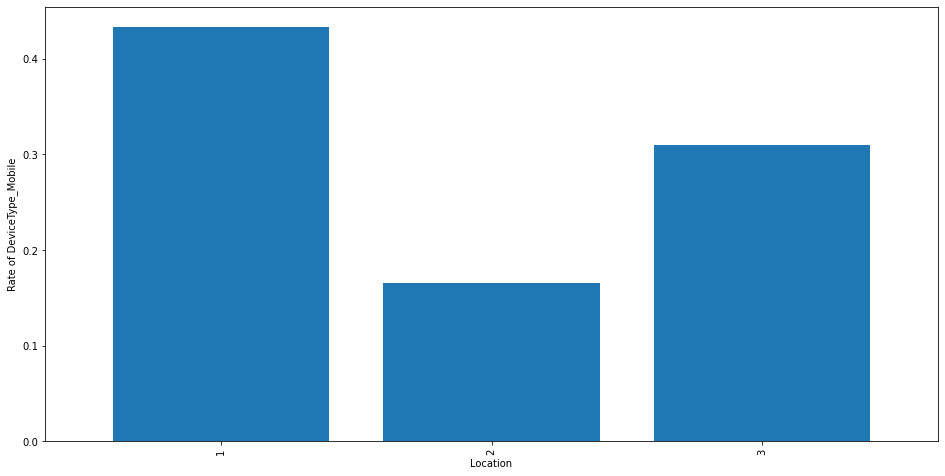

In [25]:
feat = 'DeviceType_Mobile'
ax = df_feats.groupby(df_labels['Location'])[feat].mean().plot.bar(figsize=(16,8), width=0.8)
_ = ax.set_ylabel('Rate of %s' % feat)

### Model training

This section splits df_feats and df_labels into a train and test set, trains a model on the training set, and measures performance.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Other models available, feel free to change: https://scikit-learn.org/stable/supervised_learning.html
# API reference: https://scikit-learn.org/stable/modules/classes.html

# Documentation for train_test_split:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
df_feats_TRAIN, df_feats_TEST, df_labels_TRAIN, df_labels_TEST = \
  train_test_split(df_feats, df_labels, test_size=0.25, random_state=42)

# Documentation for RandomForestClassifier:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
# Edit below to change algorithm or hyperparameters:
model = RandomForestClassifier(n_estimators = 8,
                               min_samples_leaf = 1,
                               max_features = 5)
model.fit(df_feats_TRAIN, df_labels_TRAIN['Location'])

# Documentation for LogisticRegression:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
# Edit below to change algorithm or hyperparameters:
# model = LogisticRegression(C=10., max_iter=1000)
# model.fit(df_feats_TRAIN, df_labels_TRAIN['Location'])

RandomForestClassifier(max_features=5, n_estimators=8)

In [27]:
from sklearn.metrics import classification_report

print('Performance on TRAINING set:')
cr_train = classification_report(df_labels_TRAIN, model.predict(df_feats_TRAIN), zero_division=0)
print(cr_train)

print('-'*80)
print()

print('Performance on TEST set:\n')
cr_test = classification_report(df_labels_TEST, model.predict(df_feats_TEST), zero_division=0)
print(cr_test)

Performance on TRAINING set:
              precision    recall  f1-score   support

           1       0.75      0.63      0.69      9799
           2       0.85      0.93      0.89     52869
           3       0.81      0.71      0.76     23594

    accuracy                           0.83     86262
   macro avg       0.81      0.76      0.78     86262
weighted avg       0.83      0.83      0.83     86262

--------------------------------------------------------------------------------

Performance on TEST set:

              precision    recall  f1-score   support

           1       0.32      0.27      0.29      3324
           2       0.71      0.77      0.74     17598
           3       0.46      0.40      0.43      7832

    accuracy                           0.61     28754
   macro avg       0.50      0.48      0.49     28754
weighted avg       0.60      0.61      0.60     28754



In [13]:
# from sklearn.model_selection import train_test_split
# df_feats_TRAIN, df_feats_TEST, df_labels_TRAIN, df_labels_TEST = \
#   train_test_split(df_feats, df_labels, test_size=0.25, random_state=42)

# len(df_labels_TEST[df_labels_TEST.Location == 3])

7832

In the training/testing datasets, support is the number of data points for the Location. For example, there are 9799 (3324) Location 1, 52869 (17598) Location 2 and 23594 (7832) Location 3. 

The macro avg is defined as 
$$ P_{\textrm{marco}} = \frac{(P_1 + P_2 + P_3)}{3}$$

The [weighted avg](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) is defined as
$$ P_{\textrm{weight}} = \frac{(3324*P_1 + 17598*P_2 + 7832*P_3)}{(3324+17598+7832)}.$$



### Second Multiclass Classification Model (My solution)

Compared to the above model, here I will use the following attributes: `DeviceType`, `Site`, `Browser`, `OSFamily` and `WinningPriceCPMInBucks` to build second classification model.

In [28]:
df_feats2 = extract_categorical_features(df_imps, onehot_cols=['DeviceType', 'Site', 'Browser', 'OSFamily'], minimum_count=100)
df_feats2['WinningPriceCPMInCents'] = df_imps['WinningPriceCPMInBucks']*100
df_feats2.head()

,DeviceType_PC,DeviceType_Mobile,DeviceType_Tablet,Site_mail.yahoo.com,Site_www.yahoo.com,Site_www.cnn.com,Site_295646461,Site_www.wenxuecity.com,Site_www.spotify.com,Site_weather.com,...,Browser_Safari,Browser_Firefox,Browser_InternetExplorer11,Browser_Other,OSFamily_Windows,OSFamily_OSX,OSFamily_iOS,OSFamily_Android,OSFamily_Linux,WinningPriceCPMInCents
BidFeedbackId,,,,,,,,,,,,,,,,,,,,,
2efcd9d6-aa7e-4d28-8c40-046b1f5c3380,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,982.240000
4bee1dbc-4c22-48df-b871-4c8f5d622b75,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,570.000000
5f5fa723-7687-49d5-a426-9816440c661d,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,15.080000
5a12c165-cb87-492c-9994-e17e51ca883d,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,358.094064
006dfed2-048a-4dee-8a92-74c0c95b7561,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,26.904000


In [30]:
df_feats_TRAIN, df_feats_TEST, df_labels_TRAIN, df_labels_TEST = train_test_split(df_feats2, df_labels, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators = 8,
                               min_samples_leaf = 1,
                               max_features = 5)
model.fit(df_feats_TRAIN, df_labels_TRAIN['Location'])


print('Performance on TRAINING set:')
cr_train = classification_report(df_labels_TRAIN, model.predict(df_feats_TRAIN), zero_division=0)
print(cr_train)

print('-'*80)
print()

print('Performance on TEST set:\n')
cr_test = classification_report(df_labels_TEST, model.predict(df_feats_TEST), zero_division=0)
print(cr_test)

Performance on TRAINING set:
              precision    recall  f1-score   support

           1       0.86      0.85      0.85      9799
           2       0.95      0.97      0.96     52869
           3       0.91      0.87      0.89     23594

    accuracy                           0.93     86262
   macro avg       0.91      0.90      0.90     86262
weighted avg       0.93      0.93      0.93     86262

--------------------------------------------------------------------------------

Performance on TEST set:

              precision    recall  f1-score   support

           1       0.52      0.51      0.52      3324
           2       0.85      0.87      0.86     17598
           3       0.68      0.64      0.66      7832

    accuracy                           0.77     28754
   macro avg       0.68      0.68      0.68     28754
weighted avg       0.77      0.77      0.77     28754



## Part 2 Reflection

### What modifications did you make, and why?

The first model shown above uses the attributes DeviceType and AdFormat for the multiclass classification problem. However, compared with other attributes, AdFormat is less useful for predicitve models. Instead, I use DeviceType, Browser, OSFamily and Site to build second mutli-classification model and obtained better results.

Previously we have seen Browser, OSFamily and Site are more useful features than AdFormat to identify users from tech companies or a university. For example, observed from the pie charts in Part I, I used Site to distinguish location 3 is a university, and OSFamily for location 2 is Microsoft. Therefore these attributes should be considered in the model.

By practical comparison on Test set, the second mutli-classification model certianly outperforms the first model; the macro avg and weight avg on precision, recall and F1 score in the the second model are all higher than than the first model.

### If you had more time, what would you try next?

**(1) Data Imputation:** I found TemperatureInCelsius is also a useful feature to idenfity location 1/3 and 2 (mean temperatures are 9.7C, 1.9C, 12.0C for location 1, 2, 3). However there exist missing values in the column. We can train a regression model using data with non-missing TemperatureInCelsius, and fill the missing values. Then used TemperatureInCelsius in the second classification model.

**(2) Hyperparameter search in Random Forest (RF):** The above result is given by a single shoot on RF. There are other hyperparameters in RF, like n_estimates, max_depth, max_features, max_leaf_nodes etc. To obtain the optimal performance, we need to further use 5-fold or 10-fold cross-validation to fine-tune the hypermataters and select the optimal model on the testing dataser for validation.

**(3) Feature engineer time in data:** If users from companies, I think the logs should mostly happen during daytime and weekday. Therefore parsing LogEntryTime to weekday and time should provide useful attributes.

**(4) Embedding TDID:** We can use deep learning, Keras with embedding layer to train a model. This helps us to implement embedded TDID as attributes in the model.

**(5)** The time duration in the current dataset is only a week, so it should be fine that we ranomly split training-testing dataset. If we have longer time duration in the data, I will suggest to take out-of-time (OOT) data for testing dataset (put data in time order, and take the latest 25% as OOT). In this case we better use historical behavior to predict future.


### Can you describe how this model would work in a live production environment?

After an optimal model is trained, we can convert the model to PMML file which builds rules in tree structure. For example, if in the model, the root layer uses attribute if OSFamily == 'OSX' to split, and the child layer uses if Browser == 'Chrome' to split ... etc. Each record will follow the tree structure until reaching the leaf, and the location will be predicted as majority vote on location within this leaf.

I probably will set up to update the multi-classification model in weekly batch, if the users' behavior do not vary very frequently.

## Part 3 - Brainstorm

The two tech organizations from the dataset are interested in recruiting likely candidates from the university in the dataset. In particular, they are interested in candidates that are similar to existing employees.

## Part 3 Reflection

### Briefly describe (in words, not code) how you would approach the task of identifying users (as identified by the TDID field) that are similar to eachother based on the provided dataset.

To identify similar users between companies and university, I will implement unsupervised learning: clustering analysis, or look for student users who have high similarity scores to their employees:

* For distance-based clustering, if there are a lot attributes, I will implement dimensionality reduction methods (like PCA or autoencoder) to reduce the number of features (to avoid curse of dimensionality) and then do clustering. e.g. Apple can look up university students in a cluster where there are also good Apple engineers in; this means the students are similair to their employees.
* For the latter, I will use cosine similarity to define similarity score. 1 means users have similar behavior whereas -1 opposite behavior. We define similar users who have high cosine similarity.

We need to preprocess the above data **df_imps** to describe the users' behavior as attributes. For example:

* (normalized) number of times browsing webs during 9am-11am, 11am-1pm, ....e.g. Joe browsed 150 times at 1pm-3pm.
* (normalized) number of times respectively browsing www.yahoo.com, www.wenxuecity.com, www.spotify.com etc in different time windows, daily, weekly, monthly. e.g. Jimmy browsed www.yahoo.com 5 times a week, www.wenxuecity.com 10 times in a day.
* top 1, 2 links users browsed (e.g. Jane spent more time on www.msn.com and www.cnn.com)
* top `OSFamily`, `Browser` and `DeviceType`, e.g. John mostly used OSX, Chrome and PC.
* Temperature may be useful too, some students would like to stay or move to locations with similar weather as their university.

### Can you describe how this algorithm or model would fit into a product that helped tech organizations target recruitment ads at likely candidates on college campuses?

The above approach is unsupervised learning manner. We can target recruiting ads to the students who have top avg similarity scores to their employees, with k nearest neighbor. For clustering, we can use K-means, DBScan etc to find clusters. Then we can target ads to the students who are in the clusters where there are aslo a lot tech company users located within.

However, after that, I would design the problem to **supervised learning** manner. After our models identify potential candidates and show them ads, we should collect data if students respond to recruiting ads, yes as 1, otherwise 0, and then we can turn the problem into binary classification or even a recommendation system problem, using **collaborative filtering**.

In summary, we can build a stack model, first layer is clustering or showing candidates with high similarity score (to lower false negative), and further use supervised learning models to predict if students will be interested in ads (to lower false positive).